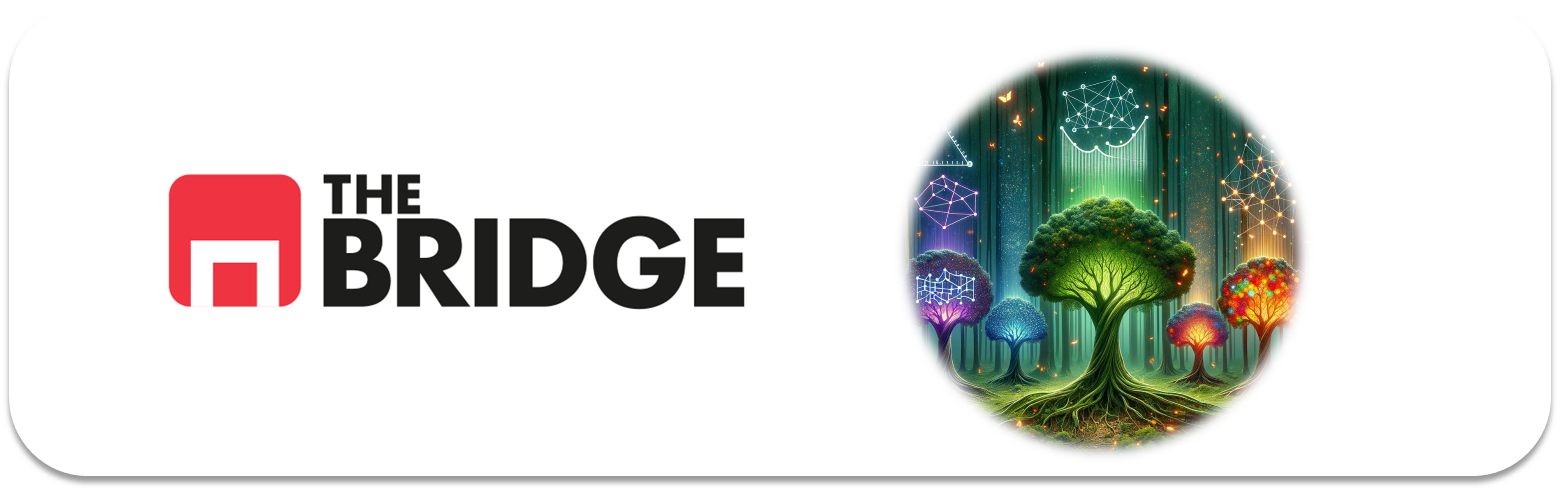

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


import bootcampviztools as bt


### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [2]:
import requests
import certifi
import pandas as pd
from io import StringIO

# URL del dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

# Descargar el contenido con verificación SSL
response = requests.get(url, verify=certifi.where())

# Convertir a un DataFrame de pandas
df = pd.read_csv(StringIO(response.text), names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])

# Mostrar las primeras filas
print(df.head())

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


In [3]:


df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

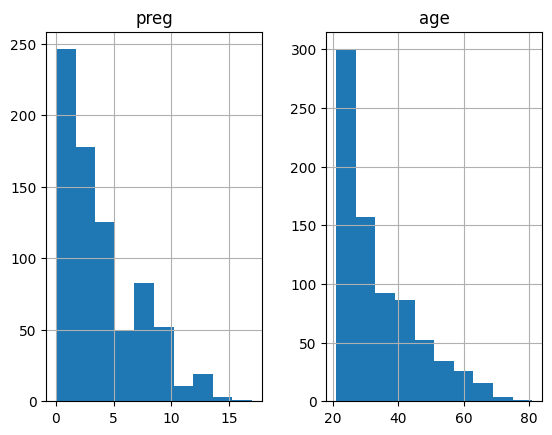

In [4]:
df[["preg","age"]].hist()

In [5]:
df.preg.value_counts()

preg
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [6]:
target = "class"

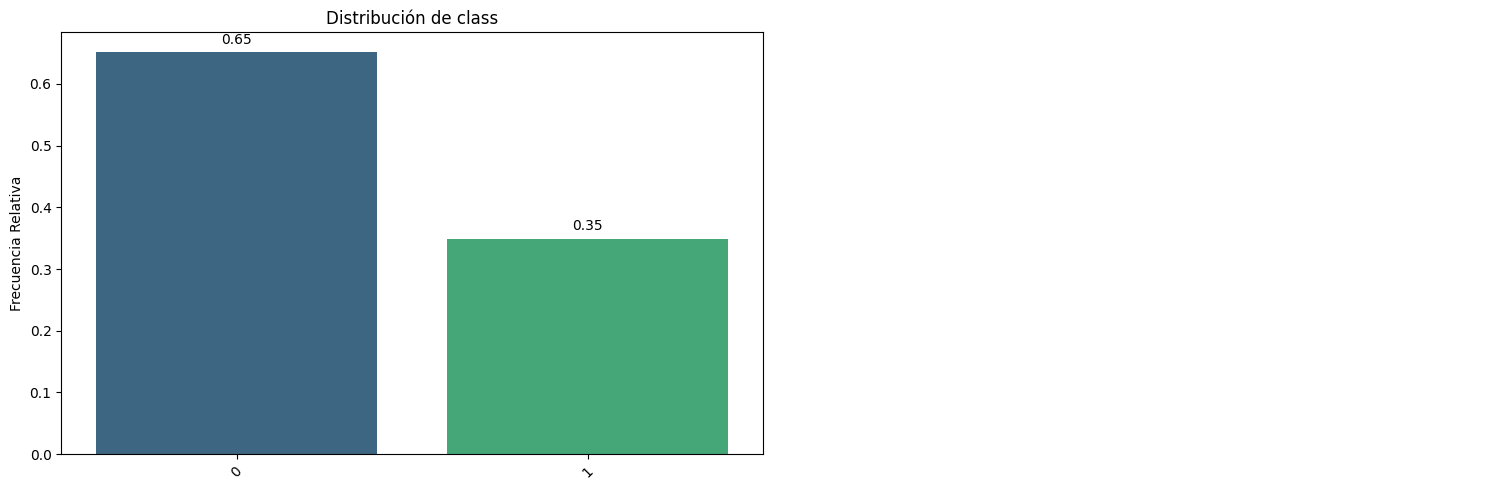

In [7]:
bt.pinta_distribucion_categoricas(df, [target], mostrar_valores = True, relativa= True)

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

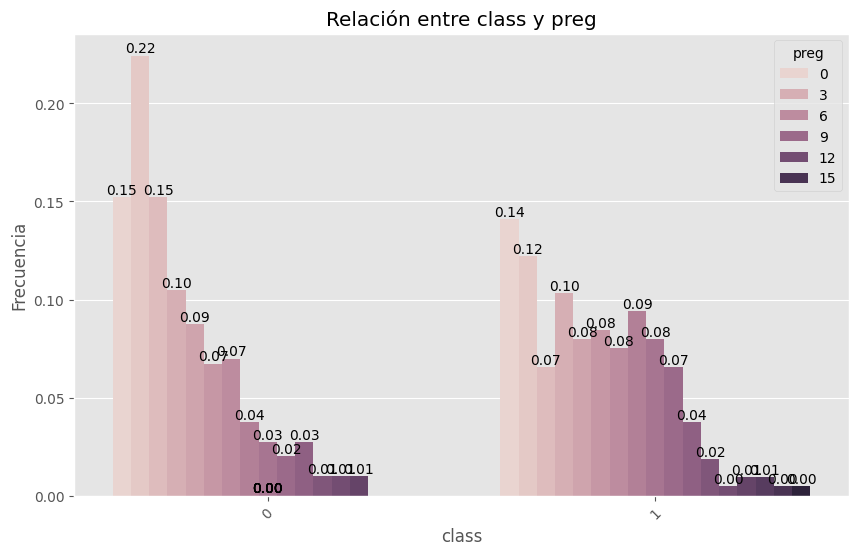

In [10]:
bt.plot_categorical_relationship_fin(train_set, target, "preg", relative_freq= True, show_values = True)

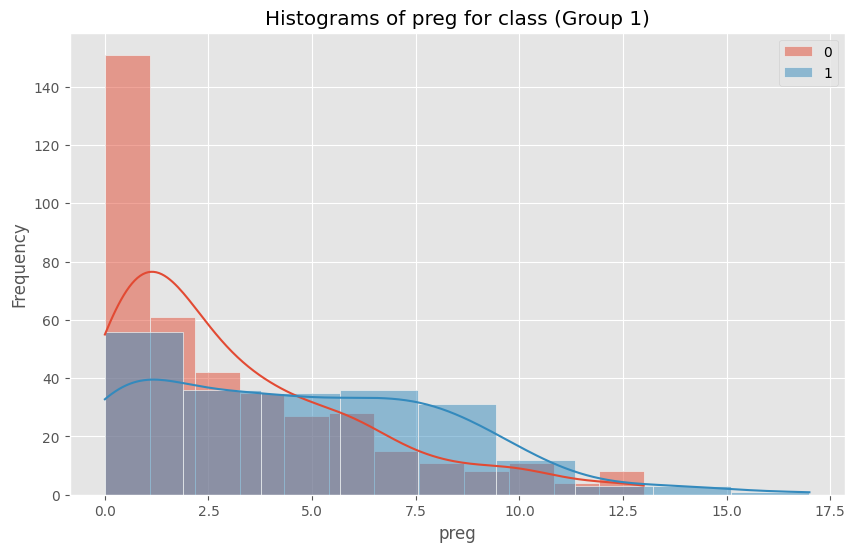

In [11]:
bt.plot_grouped_histograms(train_set, cat_col = target, num_col = "preg", group_size = 3)

In [12]:
features_num= train_set.columns.to_list()

In [13]:
features_num.remove(target)

In [14]:
import seaborn as sns

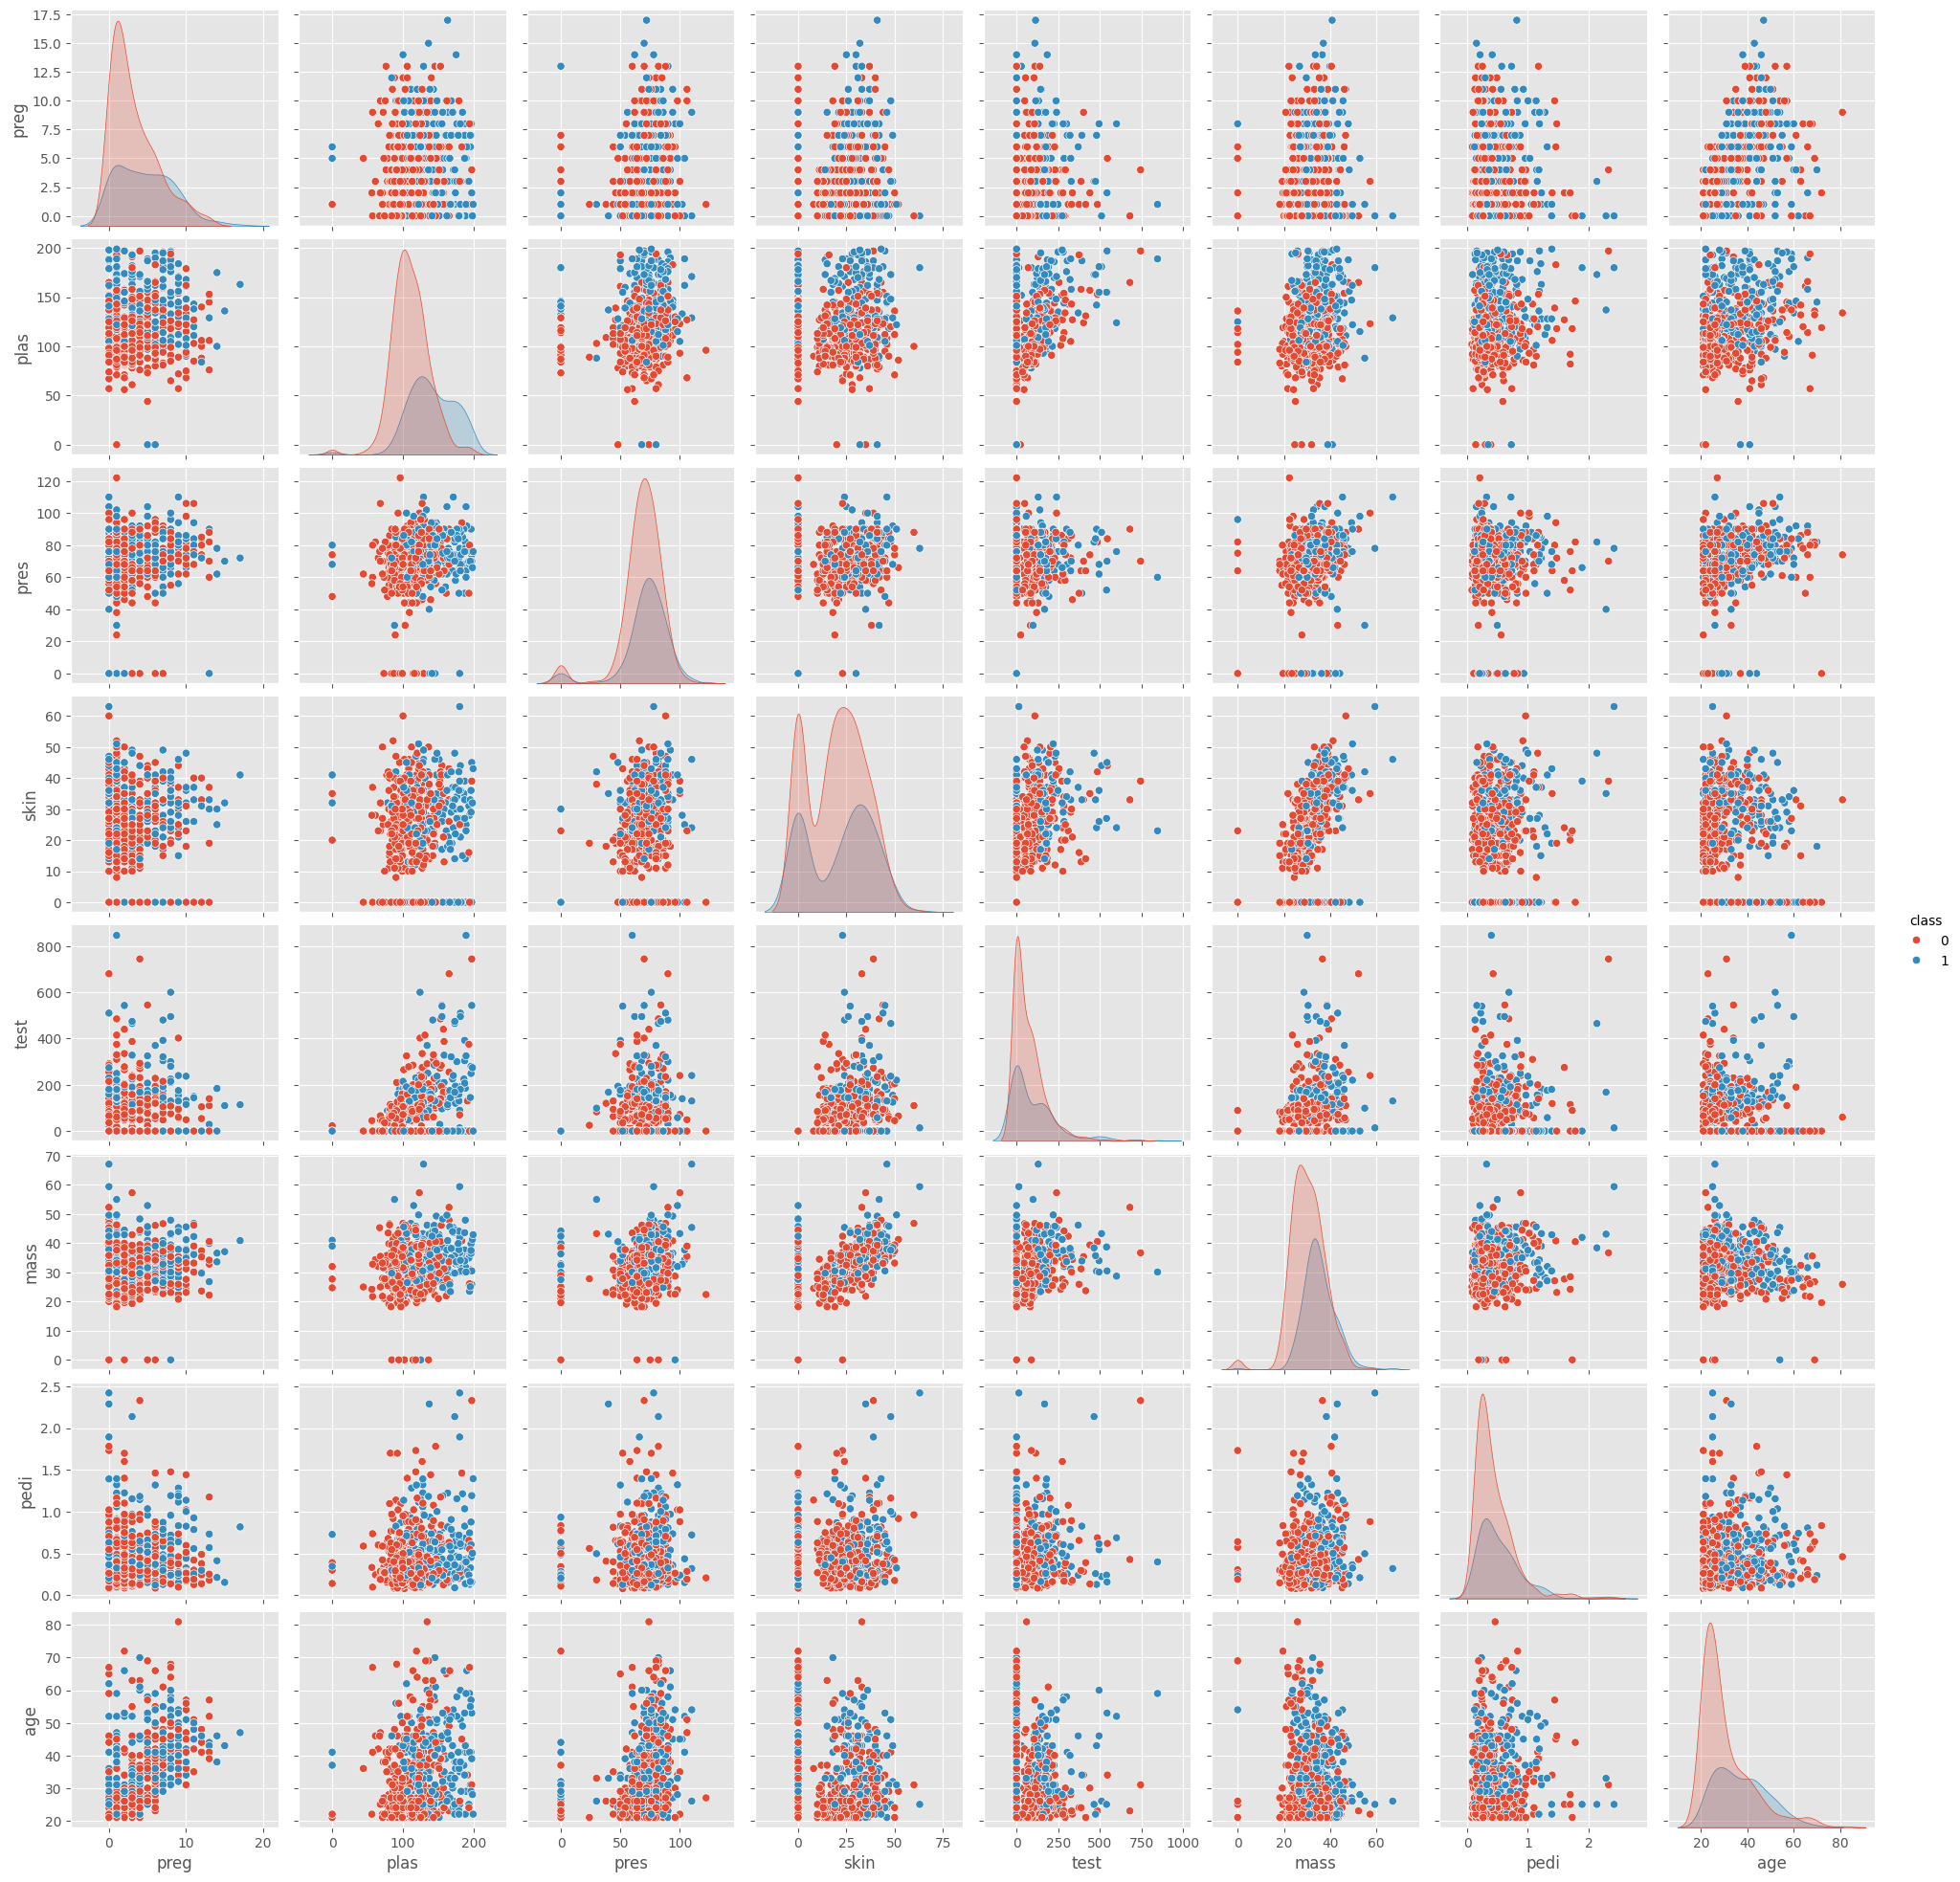

In [15]:
sns.pairplot(train_set, hue = target)

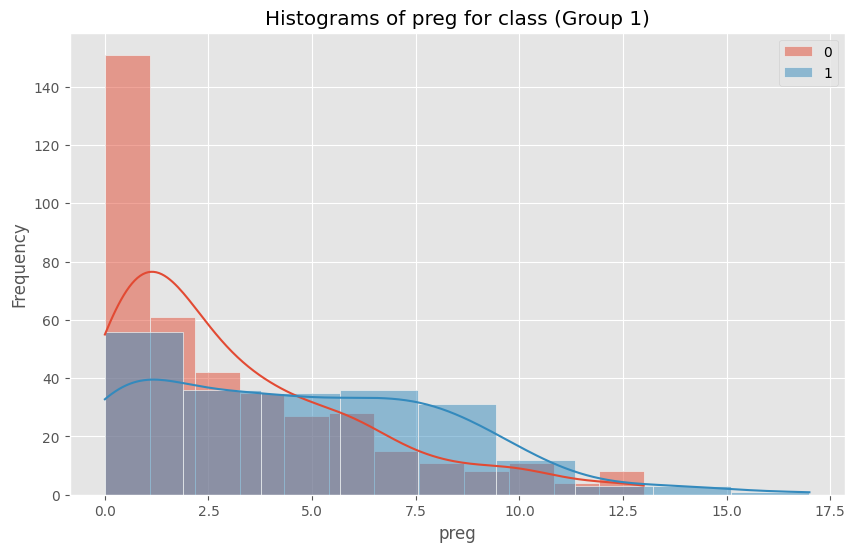

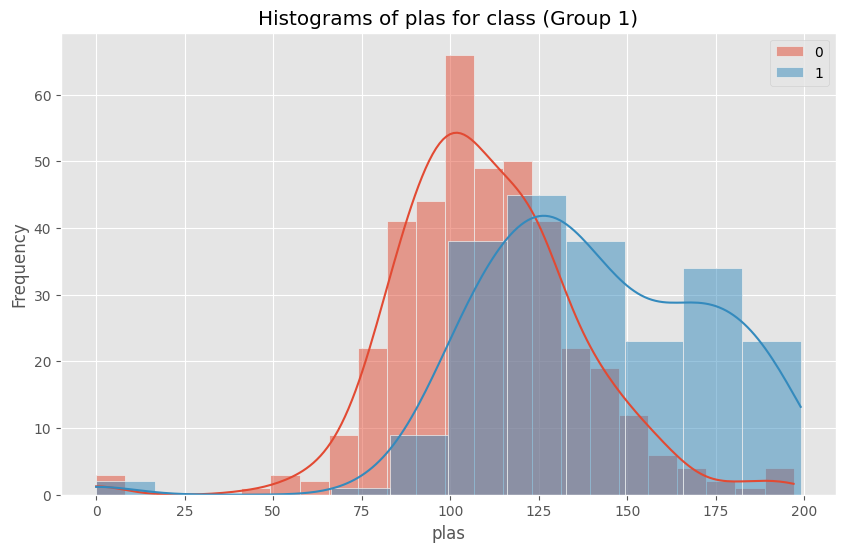

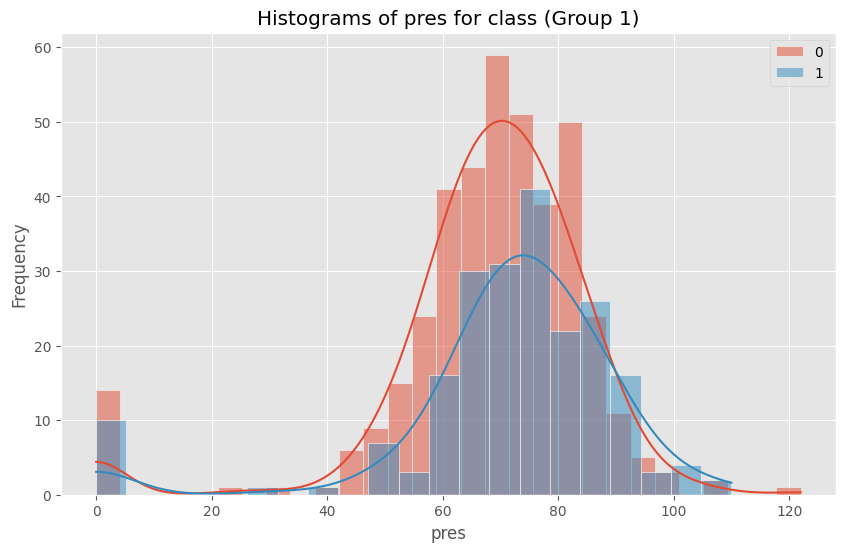

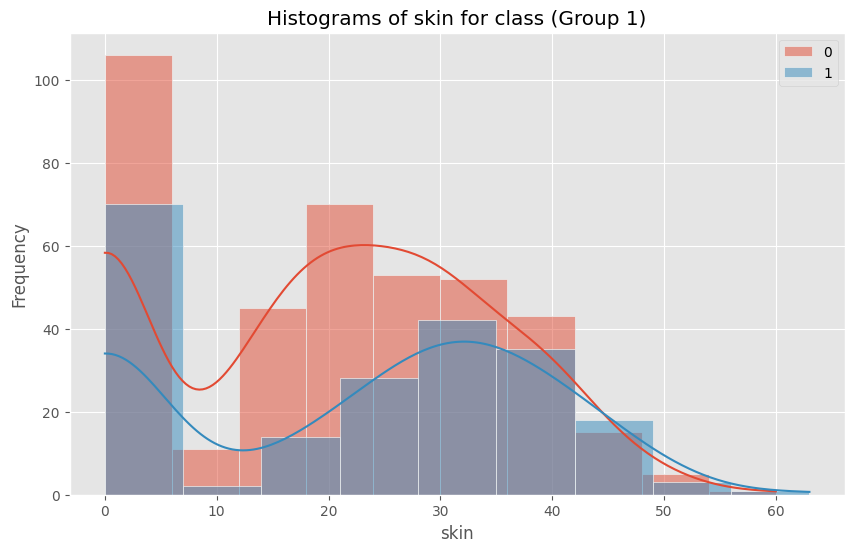

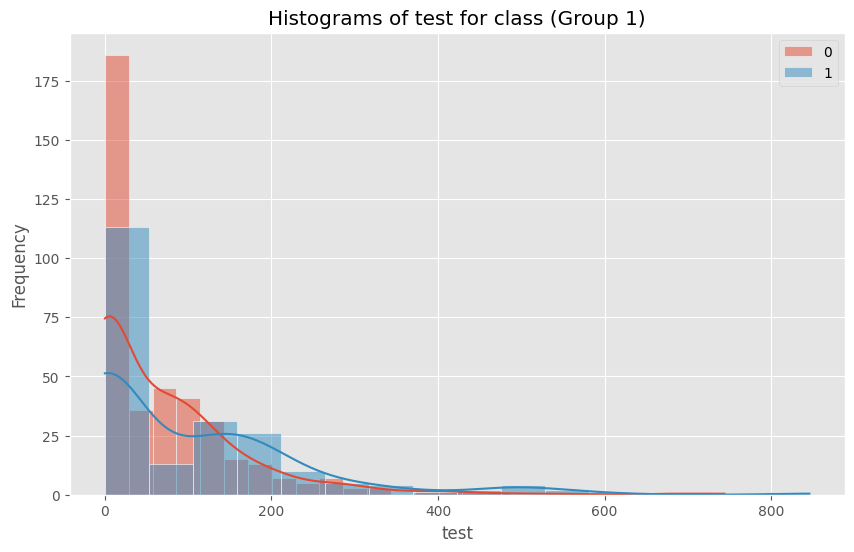

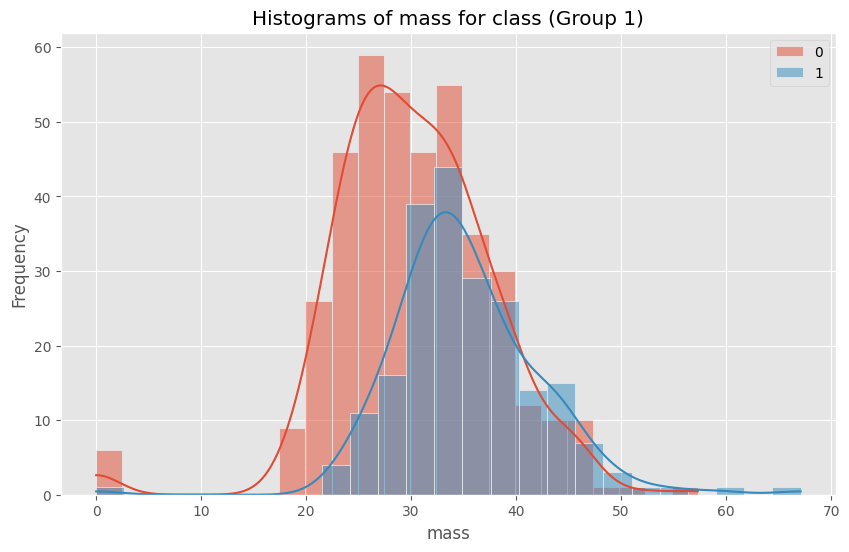

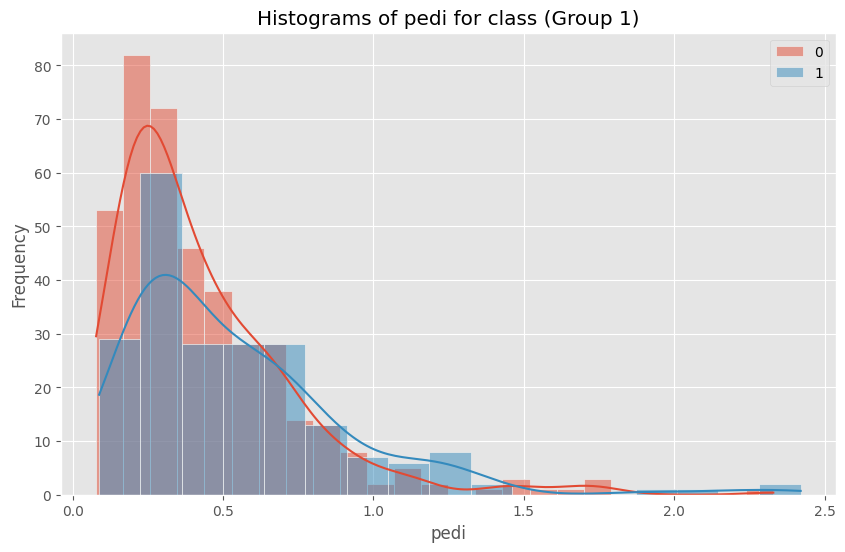

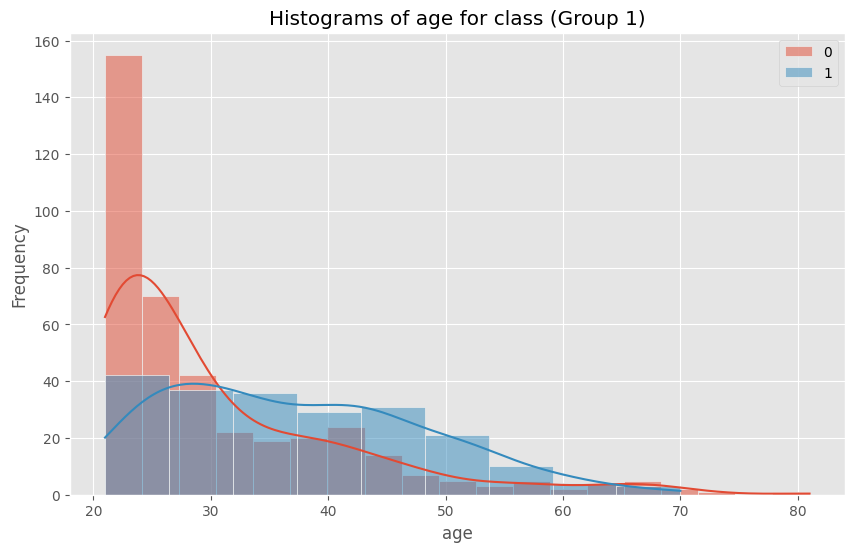

In [16]:
for col in features_num:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col = col, group_size= 3)

In [17]:
X_train = train_set[features_num]
y_train = train_set[target]
X_test = test_set[features_num]
y_test = test_set[target]

In [18]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

base_clf = RandomForestClassifier(max_depth = 5, random_state = 42)

In [20]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print("Recall medio:", np.mean(cross_val_score(base_clf, X_train, y_train, cv = 5, scoring = "balanced_accuracy")))
base_clf.fit(X_train, y_train) # para el feature Importance

Recall medio: 0.7161389504122063


RandomForestClassifier(max_depth=5, random_state=42)

In [21]:
print(classification_report(y_train, base_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       401
           1       0.89      0.69      0.78       213

    accuracy                           0.86       614
   macro avg       0.87      0.82      0.84       614
weighted avg       0.87      0.86      0.86       614



In [22]:
pd.DataFrame({"features": base_clf.feature_names_in_, "importance": base_clf.feature_importances_}).sort_values("importance")

,features,importance
3,skin,0.046559
2,pres,0.053263
0,preg,0.059891
4,test,0.069064
6,pedi,0.086599
7,age,0.160411
5,mass,0.181538
1,plas,0.342675


In [23]:
xbg_clg = XGBClassifier(max_depth = 5, random_state = 42)
lgb_clf = LGBMClassifier(max_depth = 5, verbose = -100)

for nombre,modelo in zip(["Random Forest","XGboost","LightGBM"],[base_clf, xbg_clg, lgb_clf]):
    print(f"Para{nombre}:", end = " ")
    print(np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "balanced_accuracy")))

ParaRandom Forest: 0.7161389504122063
ParaXGboost: 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [24]:
### XGBoost

param_grid = {
    "n_estimators": [100,200,400],
    "eta": [0.1,0.3,0.6,1],
    "max_depth": [1,6,10,None],
    "min_child_weight": [1,10,20,100],
    "scale_pos_weight": [len(train_set[train_set[target] == 0])/len(train_set[train_set[target] == 1]),1],
    "colsample_bytree": [0.5,1]
}

xgb_clf = XGBClassifier()

xgb_grid = GridSearchCV(xgb_clf,
                        param_grid= param_grid,
                        cv = 5,
                        scoring = "balanced_accuracy")

xgb_grid.fit(X_train,y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menoss tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.